# Autoencoders


# 1 Data Preprocessing

In [1]:
import numpy as np 
from tensorflow.keras.datasets import mnist 

- Use Keras to load the MNIST dataset. 
- Normalize the image pixel values to the range [0, 1]. 
- Flatten the 28x28 images to a 784-dimensional vector to reshape the data. 

In [2]:
# Load the dataset 
(x_train, _), (x_test, _) = mnist.load_data() 

# Normalize the pixel values 
x_train = x_train.astype('float32') / 255. 
x_test = x_test.astype('float32') / 255. 

# Flatten the images 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


# 2 Autoencoder model

This Autoencoder:
- Encoder: compresses the input to 32 dimensions
- Decoder: reconstructs the input from these 32 dimensions
- Compiled with Adam optimizer and binary crossentropy loss

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [4]:
# Encoder 
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu')(input_layer) 

# Bottleneck 
bottleneck = Dense(32, activation='relu')(encoded) 

# Decoder 
decoded = Dense(64, activation='relu')(bottleneck) 
output_layer = Dense(784, activation='sigmoid')(decoded) 

# Autoencoder model 
autoencoder = Model(input_layer, output_layer) 

# Compile the model 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Summary of the model 
autoencoder.summary() 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

# 3 Train the Autoencoder

- Training data is **both** input and target (autoencoder learns to map the input to itself)

In [5]:
autoencoder.fit(
    x_train, x_train,   
    epochs=25,  
    batch_size=256,  
    shuffle=True,  
    validation_data=(x_test, x_test)
)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3697 - val_loss: 0.1683
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1590 - val_loss: 0.1372
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1357 - val_loss: 0.1268
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1267 - val_loss: 0.1204
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1204 - val_loss: 0.1150
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1152 - val_loss: 0.1109
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1116 - val_loss: 0.1081
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1087 - val_loss: 0.1060
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1068 - val_loss: 0.1041
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1049 - val_loss: 0.1024
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1032 - val_loss: 0.1009
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

# 4 Evaluation

Evaluate: reconstruct the test images and compare them to the original images.
- "How well the autoencoder has learned to reconstruct the input data"

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step


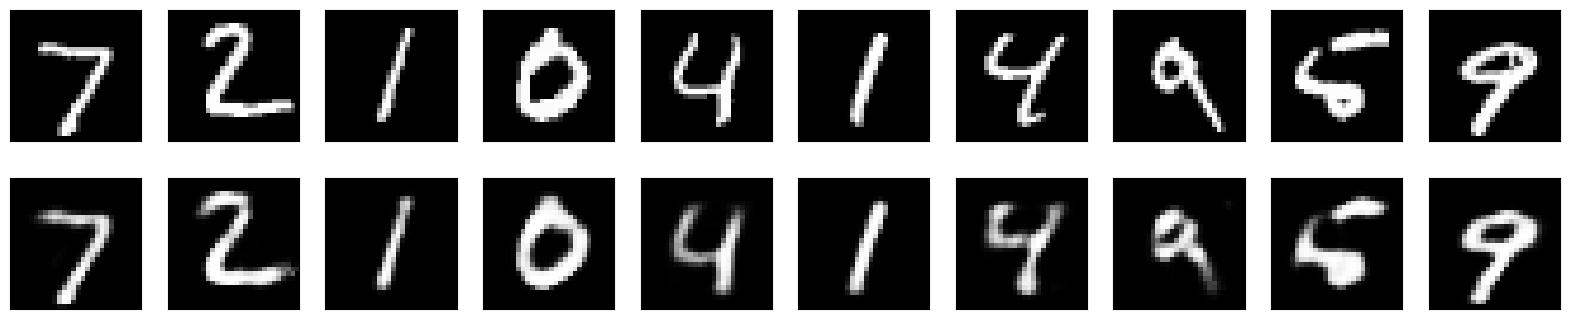

In [ ]:
import matplotlib.pyplot as plt 

# Predict the test data / Reconstruct the image
reconstructed = autoencoder.predict(x_test) 

# Visualize the results 
n = 10  # Number of digits to display 
plt.figure(figsize=(20, 4)) 

for i in range(n): 
    # Display original 
    ax = plt.subplot(2, n, i + 1)     # in a 2xn fig grid
    plt.imshow(x_test[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(reconstructed[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

plt.show()


# 5 Fine-Tuning

**Unfreeze** some layers and **train** the model again for a few more **epochs**
- freeze all layers and confirm the layers are untrainable now
- unfreeze and train some layers in the **encoder**

In [7]:
# Freeze all layers of the autoencoder
for layer in autoencoder.layers:
    layer.trainable = False

# Check trainable status of each layer
for i, layer in enumerate(autoencoder.layers):
    print(f"Layer {i}: {layer.name}, Trainable = {layer.trainable}")

Layer 0: input_layer, Trainable = False
Layer 1: dense, Trainable = False
Layer 2: dense_1, Trainable = False
Layer 3: dense_2, Trainable = False
Layer 4: dense_3, Trainable = False


In [8]:
# Unfreeze the top layers of the encoder
for layer in autoencoder.layers[-4:]: 
    layer.trainable = True 

# Compile the model again
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Train the model again
autoencoder.fit(x_train, x_train,  
                epochs=10,  
                batch_size=256,  
                shuffle=True,  
                validation_data=(x_test, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0942 - val_loss: 0.0923
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0929 - val_loss: 0.0920
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0927 - val_loss: 0.0918
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0926 - val_loss: 0.0914
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0921 - val_loss: 0.0911
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0920 - val_loss: 0.0909
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0918 - val_loss: 0.0908
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0916 - val_loss: 0.0907
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0915 - val_loss: 0.0906


# 6 Application

The autoencoder learns to reconstruct the original images from the noisy input.

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1203 - val_loss: 0.1188
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1198 - val_loss: 0.1186
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1196 - val_loss: 0.1186
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1192 - val_loss: 0.1186
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1191 - val_loss: 0.1183
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1188 - val_loss: 0.1186
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1189 - val_loss: 0.1187
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1186 - val_loss: 0.1185
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1185 - val_loss: 0.1182
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1184 - val_loss: 0.1184
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1184 - val_loss: 0.1185
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

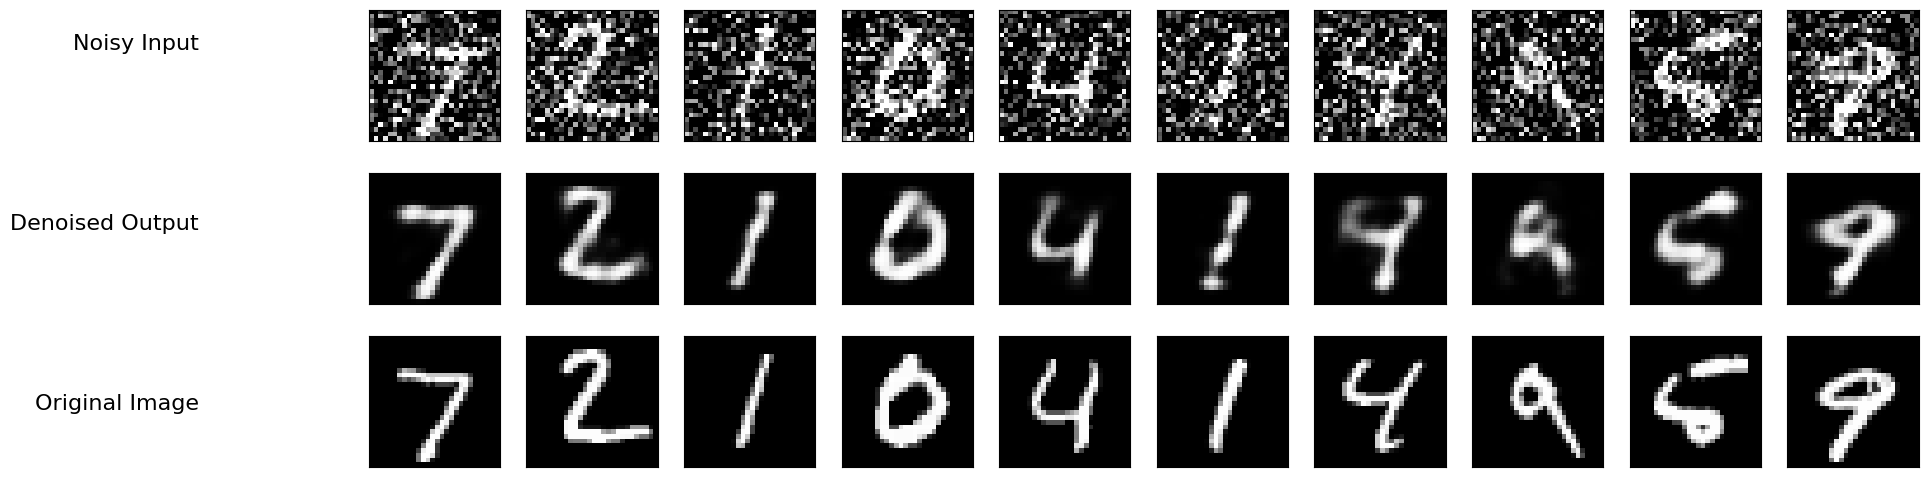

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder with noisy data
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=512,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Denoise the test images
reconstructed_noisy = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10  # Number of digits to display
fig = plt.figure(figsize=(20, 6))

fig.text(0.04, 0.82, "Noisy Input", va='center', ha='right', fontsize=16, rotation=0)
fig.text(0.04, 0.52, "Denoised Output", va='center', ha='right', fontsize=16, rotation=0)
fig.text(0.04, 0.22, "Original Image", va='center', ha='right', fontsize=16, rotation=0)


for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


---

# Explore: Different bottleneck sizes

In [13]:
# Write your code here

bottleneck_sizes = [16, 32, 64]
autoencoders = []

for size in bottleneck_sizes:
    # Build the model
    input_layer = Input(shape=(784,))
    encoded = Dense(64, activation='relu')(input_layer)
    bottleneck = Dense(size, activation='relu')(encoded)
    decoded = Dense(64, activation='relu')(bottleneck)
    output_layer = Dense(784, activation='sigmoid')(decoded)

    # Train the model
    autoencoder = Model(input_layer, output_layer)
    autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
    autoencoder.fit(
        x_train, x_train,
        epochs = 25,
        batch_size=256,
        shuffle=True,
        validation_data = (x_test, x_test)        
    )
    # Add trained models to the list
    autoencoders.append(autoencoder)

# Evaluate and compare
for i, size in enumerate(bottleneck_sizes):
    loss = autoencoders[i].evaluate(x_test, x_test)
    print(f'Bottleneck size {size} - Test loss: {loss}')

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3672 - val_loss: 0.1793
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1718 - val_loss: 0.1504
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1474 - val_loss: 0.1368
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1365 - val_loss: 0.1301
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1303 - val_loss: 0.1256
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1262 - val_loss: 0.1231
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1240 - val_loss: 0.1216
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1228 - val_loss: 0.1204
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1213 - val_loss: 0.1192
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1203 - val_loss: 0.1176
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1182 - val_loss: 0.1161
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

# Explore: Add Regularization to Autoencoders
Add L2 regularization to the Dense layer in both the encoder and decoder parts of the autoencoder
- `kernel_regularizer` parameter in Dense layer

In [16]:
from tensorflow.keras.regularizers import l2 

input_layer = Input(shape=(784,))

# Encoder with regluarization
encoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(input_layer)

bottleneck = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(encoded)

# Decoder with regularization
decoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(bottleneck)

output_layer = Dense(784, activation='sigmoid',kernel_regularizer=l2(0.01))(decoded)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.fit(
    x_train, x_train,
    epochs = 50,
    batch_size=256,
    shuffle=True,
    validation_data = (x_test, x_test)        
)

loss = autoencoder.evaluate(x_test, x_test)
print(f'Regularized Autoencoder - Test loss: {loss}')

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.7632 - val_loss: 0.4411
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4235 - val_loss: 0.3952
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3914 - val_loss: 0.3790
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3759 - val_loss: 0.3640
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3615 - val_loss: 0.3516
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3495 - val_loss: 0.3418
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3399 - val_loss: 0.3340
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3322 - val_loss: 0.3270
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3257 - val_loss: 0.3211
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3200 - val_loss: 0.3153
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3143 - val_loss: 0.3102
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

# Visualization

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step


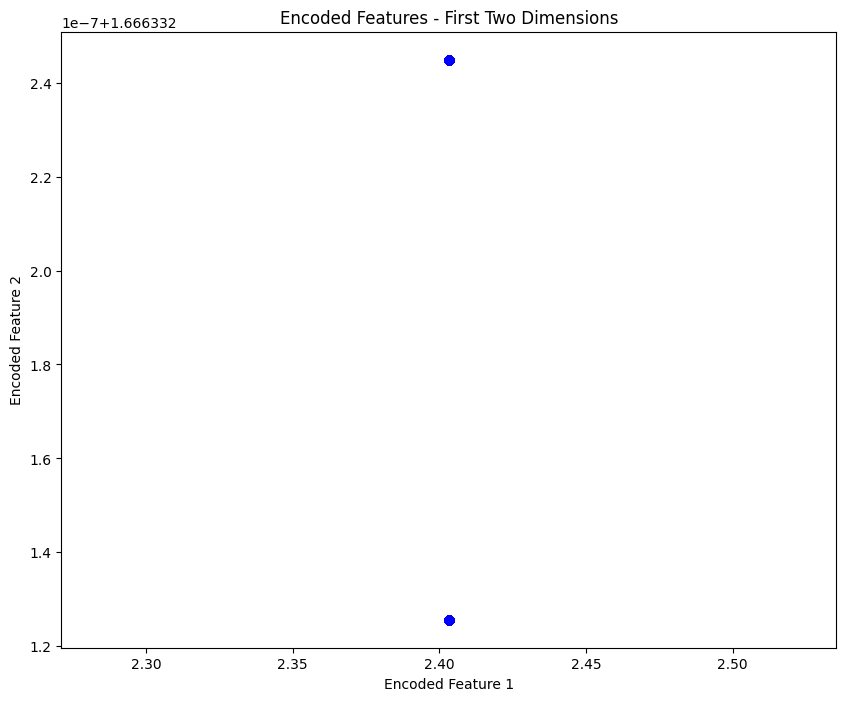

In [17]:

import matplotlib.pyplot as plt 

# Extract the encoder part of the autoencoder 
encoder_model = Model(input_layer, bottleneck) 

# Encode the test data 
encoded_imgs = encoder_model.predict(x_test) 

# Visualize the first two dimensions of the encoded features 
plt.figure(figsize=(10, 8)) 
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c='blue', alpha=0.5) 
plt.title('Encoded Features - First Two Dimensions') 
plt.xlabel('Encoded Feature 1') 
plt.ylabel('Encoded Feature 2') 
plt.show()